# <FONT COLOR="red">***NEURAL NETWORK (NN) PROGRAMMING***</FONT>
---
---
In this notebook we will see three forms of programming neural networks using.


1.   [**TensorFlow**](https://www.tensorflow.org/?hl=es-419): [TensorFlow](https://www.tensorflow.org/?hl=es-419) is an open-source library developed by Google for numerical computation and large-scale machine learning. It is a powerful and flexible tool for building and training various types of neural networks. TensorFlow provides a low-level API for fine-grained control over model creation and execution.
2.   [**Keras**](https://keras.io/): [Keras](https://keras.io/) is a high-level API for building and training neural networks. It is designed to be user-friendly and modular, making it easy to experiment with different network architectures and hyperparameters.
3.   [**Scikit-learn (sklearn)**](https://scikit-learn.org/stable/): [Scikit-learn](https://scikit-learn.org/stable/) is a popular Python library for machine learning. While primarily known for its traditional machine learning algorithms, it also provides tools for building and training neural networks using the MLPClassifier and MLPRegressor classes. These classes offer a simplified interface for creating multi-layer perceptrons, which are a type of feedforward neural network.

Before creating the neural network models, we will first create the artificial data to train the neural networks.

In [ ]:
# IMPORT COMMON LIBRARIES
import numpy as np
import scipy as sc

# IMPORT GRAPH LIBRARIES
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import display, HTML

# IMPORT DATASET
from sklearn.datasets import make_circles

In [ ]:
# CREATE ARTIFICIAL DATA
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

In [ ]:
# MAP RESOLUTION
res = 100

In [ ]:
# MAP COORDINATES
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

In [ ]:
# INPUT WITH EACH COORDINATE COMBO
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1,2)

In [ ]:
# EMPTY OBJECT TO 0.5 OF MAP PREDICTIONS
_pY = np.zeros((res,res)) + 0.5

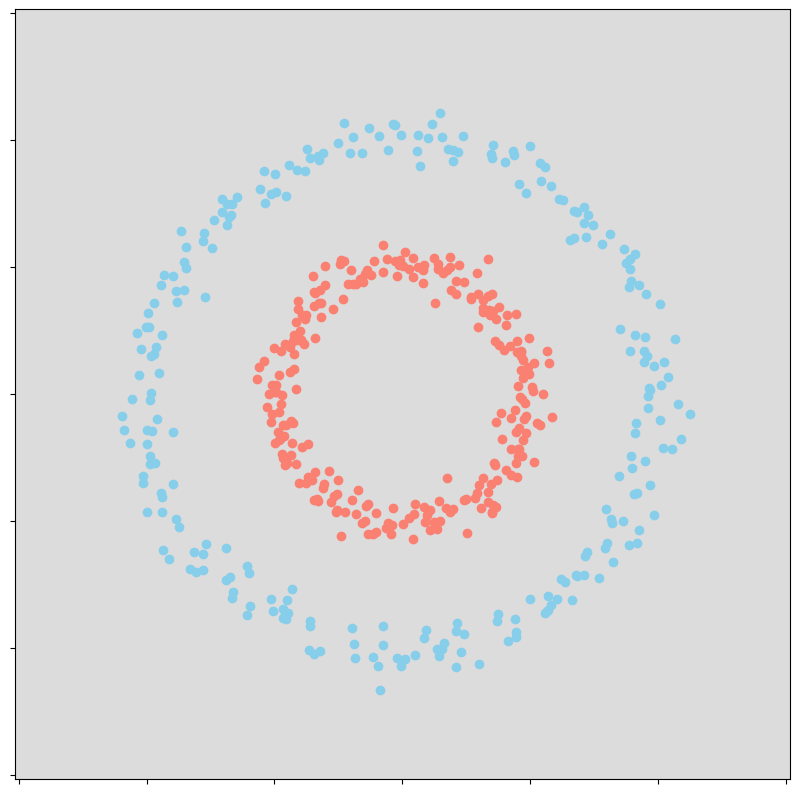

In [ ]:
# MAP PREDICTION VISUALIZATION
plt.figure(figsize=(10,10))
plt.pcolormesh(_x0, _x1, _pY, cmap='coolwarm', vmin=0, vmax=1)

# VISUALIZATION OF THE CLOUD DATA
plt.scatter(X[Y == 0,0], X[Y == 0,1], c='skyblue')
plt.scatter(X[Y == 1,0], X[Y == 1,1], c='salmon')

plt.tick_params(labelbottom=False, labelleft=False)

## <FONT COLOR="orange">**Neural Networks with Tensorflow**</FONT>
---
---

In [ ]:
# IMPORT TENSORFLOW LIBRARBY
import tensorflow as tf

In [ ]:
# DISABLED EAGER EXECUTION
# tf.compat.v1.disable_eager_execution()

In [ ]:
def create_model():
  # HIDDEN LAYER WITH 4 NEURON AND SIGMOID ACTIVATION
  input_layer = tf.keras.layers.Input(shape=(2,))
  l1 = tf.keras.layers.Dense(16, activation=tf.nn.relu)(input_layer)
  l1 = tf.keras.layers.Dropout(0.2)(l1)  # Dropout layer after l1 with rate 0.2

  l2 = tf.keras.layers.Dense(8, activation=tf.nn.relu)(l1)
  l2 = tf.keras.layers.Dropout(0.2)(l2)  # Dropout layer after l2 with rate 0.2

  l3 = tf.keras.layers.Dense(4, activation=tf.nn.relu)(l2)
  l3 = tf.keras.layers.Dropout(0.2)(l3)  # Dropout layer after l3 with rate 0.2

  # OUTPUT LAYER WITH 1 NEURON AND SIGMOID ACTIVATION
  output_layer = tf.keras.layers.Dense(2, activation=tf.nn.sigmoid)(l2)
  # Select the first output node to represent the probability
  output_layer = output_layer[:, 0]

  model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
  return model

In [ ]:
# Create the model
tf_model = create_model()

# DEFINE LOSS FUNCTION
loss_fn = tf.keras.losses.BinaryCrossentropy()

# DEFINE OPTIMIZER
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
# DEFINE LOSS FUNCTION
loss_fn = tf.keras.losses.BinaryCrossentropy()

# DEFINE OPTIMIZER
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
# Training loop
iPY = [] # List to store predictions for animation
for step in range(n_steps):
  with tf.GradientTape() as tape:
    # Calculate predictions
    pY = tf_model(X)
    # Calculate loss
    loss = loss_fn(Y, pY)
  # Get gradients
  gradients = tape.gradient(loss, tf_model.trainable_variables)
  # Update model weights
  optimizer.apply_gradients(zip(gradients, tf_model.trainable_variables))

  # Store predictions and print metrics every 25 steps
  if step % 25 == 0:
    acc = np.mean(np.round(pY.numpy()) == Y)  # Convert pY to numpy array
    print('Step', step, '/', n_steps, '- Loss = ', loss.numpy(), '- Acc =', acc)
    iPY.append(pY.numpy())  # Store predictions as numpy arrays

Step 0 / 1000 - Loss =  0.6874425 - Acc = 0.494
Step 25 / 1000 - Loss =  0.665611 - Acc = 0.658
Step 50 / 1000 - Loss =  0.63962436 - Acc = 0.846
Step 75 / 1000 - Loss =  0.6075402 - Acc = 0.902
Step 100 / 1000 - Loss =  0.5686106 - Acc = 0.986
Step 125 / 1000 - Loss =  0.5226813 - Acc = 0.996
Step 150 / 1000 - Loss =  0.46956414 - Acc = 1.0
Step 175 / 1000 - Loss =  0.4154307 - Acc = 1.0
Step 200 / 1000 - Loss =  0.36159965 - Acc = 1.0
Step 225 / 1000 - Loss =  0.3100953 - Acc = 1.0
Step 250 / 1000 - Loss =  0.2620208 - Acc = 1.0
Step 275 / 1000 - Loss =  0.21869658 - Acc = 1.0
Step 300 / 1000 - Loss =  0.181237 - Acc = 1.0
Step 325 / 1000 - Loss =  0.14983344 - Acc = 1.0
Step 350 / 1000 - Loss =  0.1238495 - Acc = 1.0
Step 375 / 1000 - Loss =  0.1017706 - Acc = 1.0
Step 400 / 1000 - Loss =  0.08359941 - Acc = 1.0
Step 425 / 1000 - Loss =  0.06954361 - Acc = 1.0
Step 450 / 1000 - Loss =  0.05850593 - Acc = 1.0
Step 475 / 1000 - Loss =  0.049745858 - Acc = 1.0
Step 500 / 1000 - Loss = 

In [ ]:
def animar_red_neuronal(X, Y, model, res=100, n_frames=50, interval=50, repeat_delay=1000):
    # Crear mapa de predicción
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x0_min, x0_max, (x0_max - x0_min) / res),
                         np.arange(x1_min, x1_max, (x1_max - x1_min) / res))
    grid_predictions = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Crear animación
    fig, ax = plt.subplots(figsize=(10, 10))
    ims = []
    for i in range(n_frames):
        im = ax.pcolormesh(xx, yy, grid_predictions, cmap='coolwarm', vmin=0, vmax=1, animated=True)
        ax.scatter(X[Y == 0, 0], X[Y == 0, 1], c='skyblue')
        ax.scatter(X[Y == 1, 0], X[Y == 1, 1], c='salmon')
        ax.tick_params(labelbottom=False, labelleft=False)
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=interval, blit=True, repeat_delay=repeat_delay)
    HTML(ani.to_html5_video())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


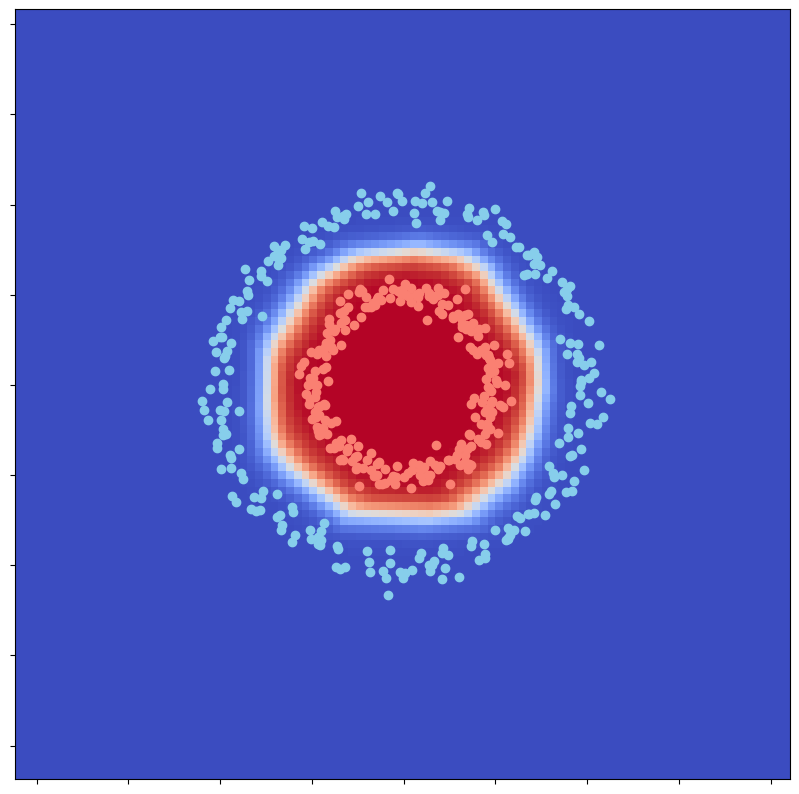

In [ ]:
animar_red_neuronal(X, Y, tf_model)

## <FONT COLOR="orange">**Neural Network with Keras**</FONT>
---
---

In [ ]:
# IMPORT LIBRARIES
import tensorflow.keras as kr

In [ ]:
# TRAIN PARAMETERS
lr = 0.01 # Learning Rate
nn = [2, 16, 8, 1] # Neurons per Layer

In [ ]:
# CREATE THE NEURAL NETWORK AS LAYER SEQUENCE
kr_model = kr.Sequential()
l1 = kr_model.add(kr.layers.Dense(nn[1], activation='relu'))
l2 = kr_model.add(kr.layers.Dense(nn[2], activation='relu'))
l3 = kr_model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

In [ ]:
# COMPILE MODEL
kr_model.compile(loss='mse', optimizer=kr.optimizers.Adam(learning_rate=lr), metrics=['acc'])

In [ ]:
# MODEL TRAIN
kr_model.fit(X, Y, epochs=100)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.4372 - loss: 0.2569
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.5600 - loss: 0.2179 
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8602 - loss: 0.1744 
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9916 - loss: 0.1139 
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 0.0527 
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 0.0201 
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 0.0073 
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 0.0041 
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 0.0022 
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 0.0015 
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 0.0011 
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 8.0597e-04
Epoch 13/100
16/16 ━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


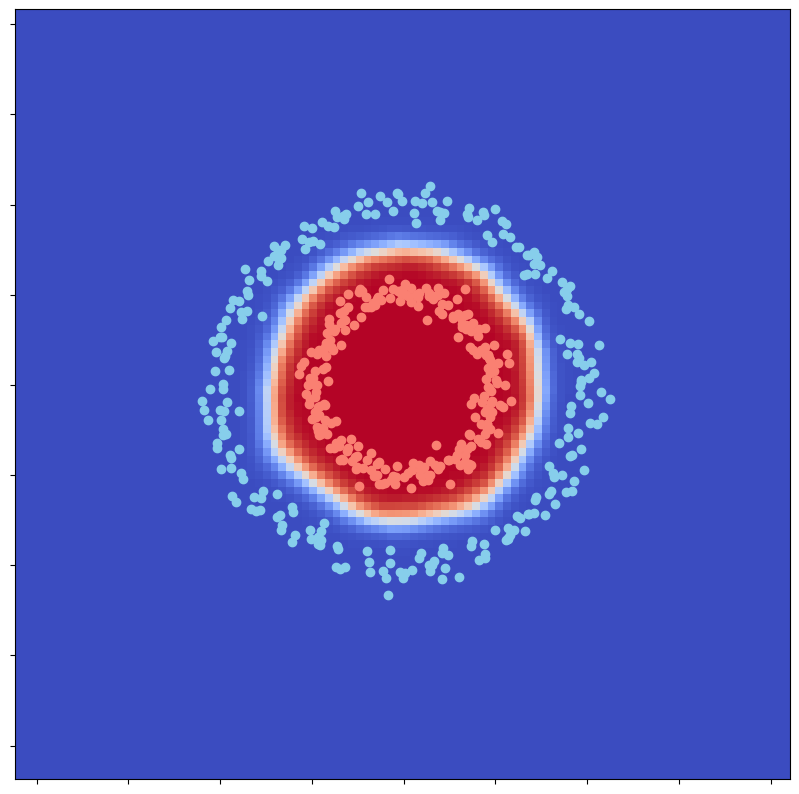

In [ ]:
animar_red_neuronal(X, Y, kr_model)

## <FONT COLOR="orange">**Neural Network with Scikit-Learn**</FONT>
---
---

In [ ]:
# IMPORT COMMON LIBRARIES
import sklearn as sk
import sklearn.neural_network as sknn

In [ ]:
# TRAIN PARAMETERS
lr = 0.01 # Learning Rate
nn = [2, 16, 8, 1] # Neurons per Layer

In [ ]:
# CREATE THE NEURAL NETWORK MODEL
sk_model = sknn.MLPRegressor(
  solver='sgd',
  learning_rate_init=lr,
  hidden_layer_sizes=tuple(nn[1:]),
  verbose=True,
  n_iter_no_change=1000,
  batch_size=64
)

In [ ]:
# TRAIN MODEL
sk_model.fit(X, Y)

Iteration 1, loss = 2.07697683
Iteration 2, loss = 0.79202566
Iteration 3, loss = 0.19284532
Iteration 4, loss = 0.13738870
Iteration 5, loss = 0.15758906
Iteration 6, loss = 0.14515943
Iteration 7, loss = 0.12960583
Iteration 8, loss = 0.12532197
Iteration 9, loss = 0.12524309
Iteration 10, loss = 0.12549684
Iteration 11, loss = 0.12522427
Iteration 12, loss = 0.12510116
Iteration 13, loss = 0.12509230
Iteration 14, loss = 0.12506076
Iteration 15, loss = 0.12507873
Iteration 16, loss = 0.12507321
Iteration 17, loss = 0.12506906
Iteration 18, loss = 0.12509496
Iteration 19, loss = 0.12505157
Iteration 20, loss = 0.12503623
Iteration 21, loss = 0.12515874
Iteration 22, loss = 0.12507519
Iteration 23, loss = 0.12508358
Iteration 24, loss = 0.12504767
Iteration 25, loss = 0.12505297
Iteration 26, loss = 0.12503355
Iteration 27, loss = 0.12505151
Iteration 28, loss = 0.12507300
Iteration 29, loss = 0.12505924
Iteration 30, loss = 0.12510278
Iteration 31, loss = 0.12503574
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=64, hidden_layer_sizes=(16, 8, 1),
             learning_rate_init=0.01, n_iter_no_change=1000, solver='sgd',
             verbose=True)

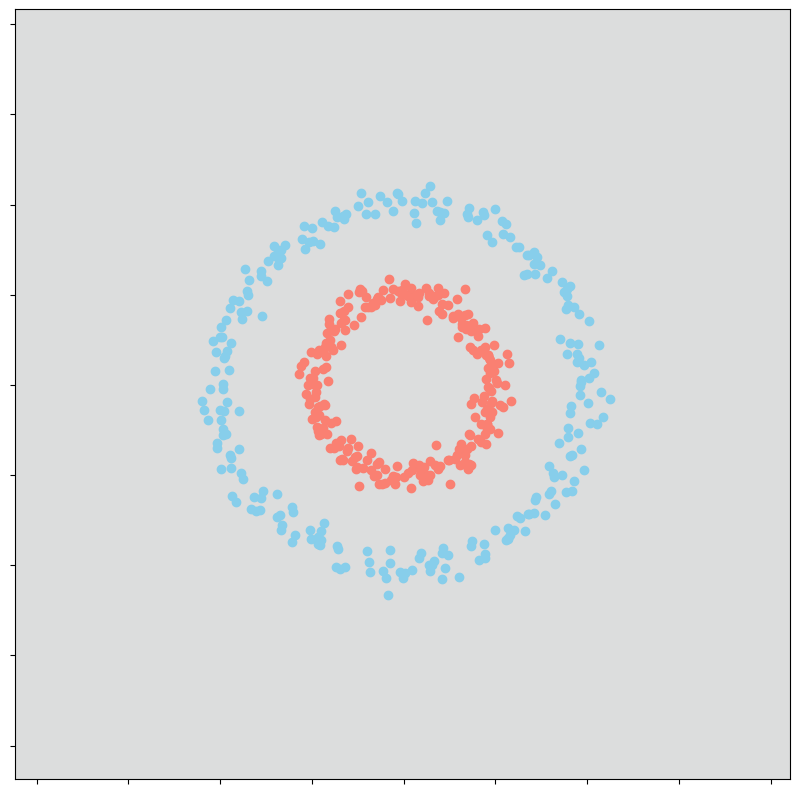

In [ ]:
# GRAPH RESULT
animar_red_neuronal(X, Y, sk_model)